In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
current_path = '/content/drive/My Drive/Colab Notebooks/Project_GANder/gankook_cuda/semantic-segmentation-pytorch/'

import os
os.chdir(current_path)

!ls

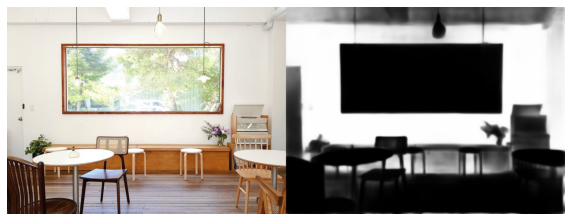

(142, 746, 4)


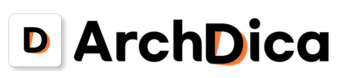

image.shape : (829, 2238, 4)
logo.shape : (142, 746, 4)


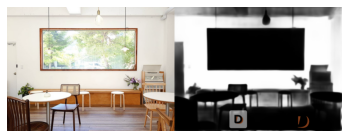

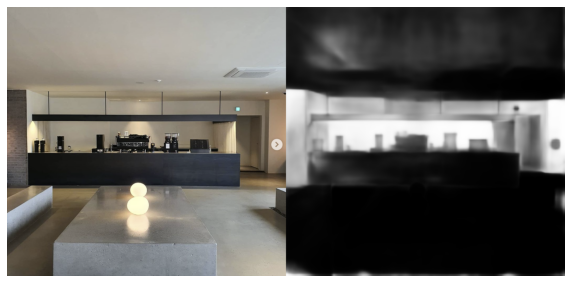

(140, 736, 4)


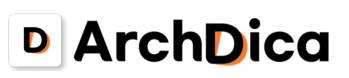

image.shape : (1066, 2210, 4)
logo.shape : (140, 736, 4)


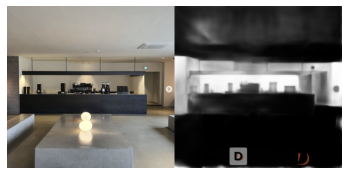

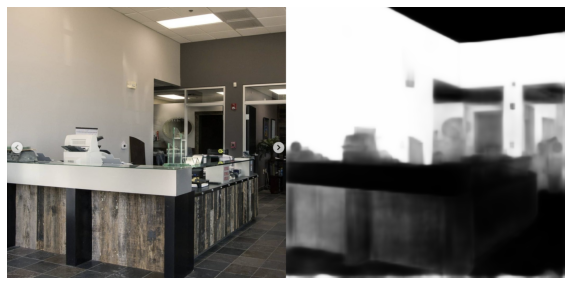

(140, 738, 4)


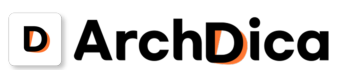

image.shape : (1076, 2214, 4)
logo.shape : (140, 738, 4)


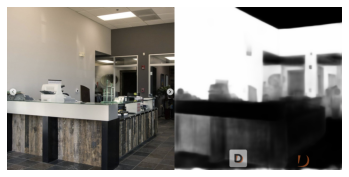

In [60]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import time
# import os
import cv2
# import pylab as pl
from skimage import morphology as mp
import sys
# from PIL import ImageOps


#       Input Params      #
horizontal_logo_ratio = 1 / 3


image_dir = 'test_result/wall/'
for image_path in os.listdir(image_dir):

  #     Target Image     #
  image_path = image_dir + image_path
  image = Image.open(image_path)
  plt.figure(figsize=(10, 5))
  plt.imshow(image)
  plt.axis('off')
  plt.show()

  h, w = np.array(image).shape[:2]
  
  #       Logo Image      #
  logo_path = 'Logo/KakaoTalk_20210113_151852172.png' #KakaoTalk_20210111_111940068 / Deepbuild_logo / KakaoTalk_20210111_111940068_01
  logo = Image.open(logo_path)
  # logo = Image.fromarray(np.invert(np.array(logo)))
  # logo = 1 - np.array(logo)

  
  #       Logo Resize     #     
  lh, lw = np.array(logo).shape[:2]
  resize_factor = w * horizontal_logo_ratio/ lw
  logo = logo.resize((int(lw * resize_factor), int(lh * resize_factor)))
  print(np.array(logo).shape)
  lh, lw = np.array(logo).shape[:2]

  plt.imshow(logo)
  plt.axis('off')
  plt.show()

  #       Add Logo      #
  if np.array(image).shape[2] <= 3:
    image = np.dstack([image, np.ones((h, w), dtype="uint8") * 255])
  if np.array(logo).shape[2] <= 3:
    logo = np.dstack([logo, np.ones((lh, lw), dtype="uint8") * 255])
  print('image.shape :', np.array(image).shape)
  print('logo.shape :', np.array(logo).shape)

  overlay = np.zeros((h, w, np.array(logo).shape[2]), dtype="uint8")
  overlay[h - lh - 10:h - 10, w - lw - 10:w - 10] = logo

  cv2.addWeighted(overlay, .5, image, 1., 0, image)
  plt.imshow(image)
  plt.axis('off')
  plt.show()